<a href="https://colab.research.google.com/github/zainabhameed24/Zainab-Hameed_Intership_of_Developer-_Hub_Corporations_Tasks/blob/main/Internship_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Task 5: Personal Loan Acceptance Prediction ***
Objective:
 Predict which customers are likely to accept a personal loan offer.
Dataset:
 Bank Marketing Dataset (UCI Machine Learning Repository)

**Perform basic data exploration on features such as age, job, and marital status.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df=pd.read_csv("/content/bank.csv")
print(df.head(2))
print(df.info)


   age     job  marital  education default  balance housing loan  contact  \
0   59  admin.  married  secondary      no     2343     yes   no  unknown   
1   56  admin.  married  secondary      no       45      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ..

Shape of dataset: (11162, 17)

First 5 rows:
    age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Age statistics:
 count    11162.000000
mean        4

/tmp/ipython-input-3543079622.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="job", data=df, palette="Set2")
/tmp/ipython-input-3543079622.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="marital", data=df, palette="Set3")


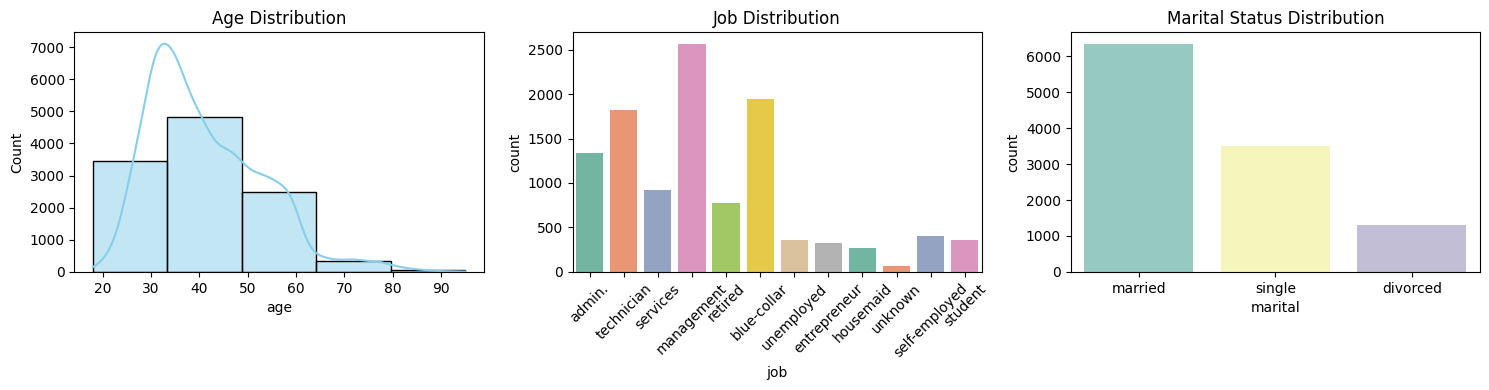

In [3]:
# 1. Overview of data
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# 2. Summary statistics for age
print("\nAge statistics:\n", df["age"].describe())

# 3. Categorical variable counts
print("\nJob distribution:\n", df["job"].value_counts())
print("\nMarital distribution:\n", df["marital"].value_counts())

# 4. Visualizations
plt.figure(figsize=(15, 4))

# Age histogram
plt.subplot(1, 3, 1)
sns.histplot(df["age"], bins=5, kde=True, color="skyblue")
plt.title("Age Distribution")

# Job barplot
plt.subplot(1, 3, 2)
sns.countplot(x="job", data=df, palette="Set2")
plt.title("Job Distribution")
plt.xticks(rotation=45)

# Marital barplot
plt.subplot(1, 3, 3)
sns.countplot(x="marital", data=df, palette="Set3")
plt.title("Marital Status Distribution")

plt.tight_layout()
plt.show()

**Train a Logistic Regression or Decision Tree classifier.**

In [4]:
# ---------------- PREPROCESS ----------------
# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df [col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("loan", axis=1)  # Replace with your target column
y = df["loan"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- LOGISTIC REGRESSION ----------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ---------------- DECISION TREE ----------------
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# ---------------- CONFUSION MATRIX ----------------
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_tree)
)




Logistic Regression Accuracy: 0.877295118674429
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1960
           1       0.00      0.00      0.00       273

    accuracy                           0.88      2233
   macro avg       0.44      0.50      0.47      2233
weighted avg       0.77      0.88      0.82      2233

Decision Tree Accuracy: 0.877295118674429
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1960
           1       0.47      0.03      0.06       273

    accuracy                           0.88      2233
   macro avg       0.68      0.51      0.49      2233
weighted avg       0.83      0.88      0.83      2233

Confusion Matrix (Logistic Regression):
 [[1959    1]
 [ 273    0]]
Confusion Matrix (Decision Tree):
 [[1951    9]
 [ 265    8]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Analyze the results to identify which customer groups are more likely to accept the offer.**

In [9]:
# ----------------Get Feature Importance ----------------
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(importance)


      Feature  Coefficient
4     default     0.289793
6     housing     0.184843
9       month     0.023383
11   campaign     0.019197
13   previous     0.007920
8         day     0.002877
10   duration     0.000433
5     balance    -0.000134
12      pdays    -0.001107
0         age    -0.014421
1         job    -0.042830
14   poutcome    -0.053616
7     contact    -0.204196
3   education    -0.229180
2     marital    -0.388201
15    deposit    -0.754357
